<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/ResidualizedRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [155]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial

### **Functions**

In [156]:
def propensity_score(x1, x2, x3):
  return 0.4*x1 + 0.3*x2 + 0.2*x3

def outcome(x1, x2, x3, d, key):
  return (2*x1 + 1*x2 + 0.5*x3 + 2*d + jax.random.normal(key))*100

def sample(key):
  k1, k2, k3 = jax.random.split(key, 3)
  xs = jax.random.uniform(k1, shape=(3,))
  ps = propensity_score(*xs)
  d = jax.random.bernoulli(k2, ps).astype(jnp.float32)
  y = outcome(*xs, d, k3)
  return xs, d, y

def batch_sample(n, key):
  return jax.vmap(sample)(jax.random.split(key, n))

def Estimator1(n, key):
    xs, ds, ys = batch_sample(n, key)
    ds, ys = ds.reshape(-1, 1), ys.reshape(-1, 1)
    xs = xs[:, 0].reshape(-1, 1)
    regs = jnp.hstack([ds, xs, jnp.ones_like(xs)])
    return jnp.linalg.lstsq(regs, ys)[0][0]

def Estimator2(n, key):
    xs, ds, ys = batch_sample(n, key)
    ds, ys = ds.reshape(-1, 1), ys.reshape(-1, 1)
    xs = xs[:, :2]
    regs = jnp.hstack([ds, xs, jnp.ones((n, 1))])
    return jnp.linalg.lstsq(regs, ys)[0][0]

def Estimator3(n, key):
    xs, ds, ys = batch_sample(n, key)
    ds, ys = ds.reshape(-1, 1), ys.reshape(-1, 1)
    regs = jnp.hstack([ds, xs, jnp.ones((n, 1))])
    return jnp.linalg.lstsq(regs, ys)[0][0]

### **Parameters**

In [157]:
n = 10000
key = jax.random.PRNGKey(0)
simulations = 1000
bins=25

$$y_i = \alpha + \beta D_i + \gamma x_i + ɛ_i$$

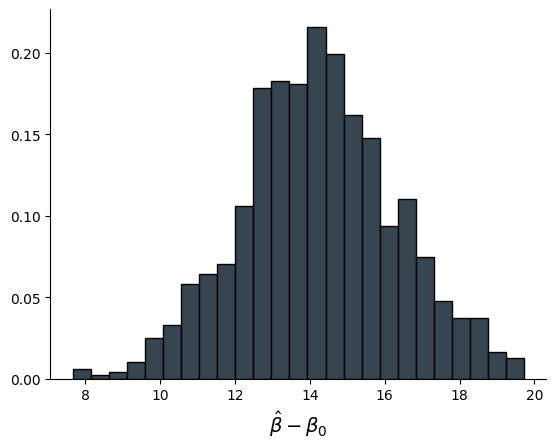

In [158]:
estimates1 = jax.vmap(partial(Estimator1, n))(jax.random.split(key, simulations))
standardized_estimates1 = (estimates1 - jnp.mean(estimates1)) / jnp.std(estimates1)
fig, ax = plt.subplots()
plt.hist(estimates1- 200.0, edgecolor='black',  density=True, color="#36454F", bins=bins)
plt.xlabel(r'$\hat{\beta} - \beta_0$', size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

$$y_i = \alpha + \beta D_i + \gamma_1 x_{1i} + + \gamma_2 x_{2i} + + \gamma_3 x_{3i} + ɛ_i$$

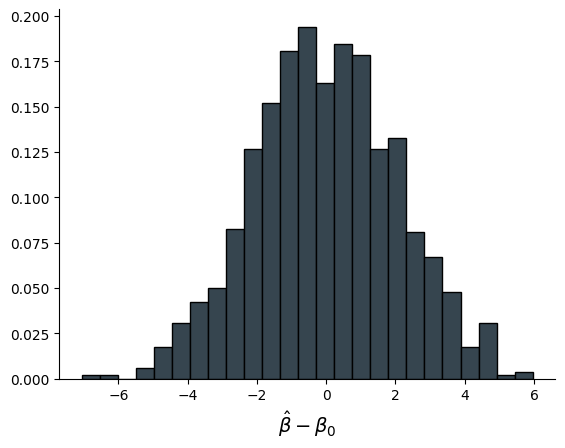

In [159]:
estimates3 = jax.vmap(partial(Estimator3, n))(jax.random.split(key, simulations))
standardized_estimates3 = (estimates3 - jnp.mean(estimates3)) / jnp.std(estimates3)
fig, ax = plt.subplots()
plt.hist(estimates3 - 200.0, edgecolor='black',  density=True, color="#36454F", bins=bins)
plt.xlabel(r'$\hat{\beta} - \beta_0$', size=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()